<a href="https://colab.research.google.com/github/NBN879/ML_course_from_Innopolis/blob/master/%D0%90%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%E2%84%962_2024_08_07_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Описание**

Для промежуточной аттестации необходимо выполнить анализ данных, применяя знания, полученные в рамках изученных тем. Вам будет предоставлен датасет, который вы должны будете проанализировать, построить модели и оценить их качество.

Ваша задача — продемонстрировать понимание и умение применять методы машинного обучения, такие как регрессия, классификация, деревья решений и случайные леса.

Датасеты на выбор: Titanic (классификация, целевая переменная survived), California Housing (регрессия, целевая переменная median_house_value), **Boston Housing Dataset** (регрессия, целевая переменная MEDV), Breast Cancer Wisconsin (классификация, целевая переменная Diagnosis)

**Задание**:
1.   **Загрузка и предобработка данных**:
*   Выберите датасет из списка
*   Выполните предварительную обработку данных: заполнение пропущенных
значений, кодирование категориальных признаков, нормализацию данных
(если необходимо).

2.   **Анализ данных**:
*   Выполните первичный анализ данных: статистические характеристики,
распределение признаков, корреляционный анализ.
*   Постройте визуализации для лучшего понимания структуры данных.

3.   **Построение модели линейной регрессии (для задач регрессии)**:
*   Постройте модель линейной регрессии для предсказания целевой
переменной.
*   Оцените качество модели с использованием метрик R² и средней
квадратичной ошибки (MSE).
*   Визуализируйте предсказанные значения и остатки модели.

4.   **Построение модели логистической регрессии (для задач классификации)**:
*   Постройте модель логистической регрессии для бинарной классификации.
*   Оцените качество модели с использованием метрик точности (accuracy),
полноты (recall), точности (precision) и F1-меры.
*   Постройте ROC-кривую и вычислите AUC.

5.   **Построение модели дерева решений**:
*   Оцените качество модели с использованием соответствующих метрик
6.   **Построение модели случайного леса**:
*   Оцените качество модели с использованием соответствующих метрик
7.   **Сравнение моделей**:
*   Сравните результаты всех построенных моделей.
*   Обсудите преимущества и недостатки каждой модели, а также их
применимость к данному набору данных.




# Анализ датасета "Boston Housing" 🏠



**Подключение библиотек и скриптов**

In [4]:
# Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Разделение датасета
from sklearn.model_selection import train_test_split

# Модели
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree


# Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [95]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

# Создание пустого датафрейма. В дальнейшем будет заполняться метриками качества
df_metrics = pd.DataFrame()

**Пути к директориям и файлам**

In [6]:
DATASET_PATH = './boston_housing.csv' # "сырой" датасет
PREPARED_DATASET_PATH = './boston_housing_prepared.csv' # сохраненный готовый датасет

## Загрузка данных

**Описание датасета**

Набор данных о жилье в Бостоне основан на информации, собранной Службой переписи населения США о жилье в районе Бостона, Массачусетс. Ниже описаны столбцы набора данных:

**CRIM** - уровень преступности на душу населения.

**ZN** – доля жилых земель, зонированных на участки площадью более 25 000 кв. футов.

**INDUS** - доля площадей под неторговую деятельность на город.

**CHAS** — фиктивная переменная реки Чарльз (1, если тракт ограничивает реку; 0 в противном случае).

**NOX** - концентрация оксидов азота (частей на 10 миллионов).

**RM** - среднее количество комнат в жилом помещении.

**AGE** - доля квартир, занимаемых владельцами, построенных до 1940 г.

**DIS** – взвешенные расстояния до пяти центров занятости Бостона.

**RAD** - индекс доступности радиальных автомобильных дорог.

**TAX** — ставка налога на имущество в размере полной стоимости за 10 000 долларов США.

**PTRATIO** - соотношение учеников и учителей.

**B** - 1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам.

**LSTAT** - % более низкого статуса населения.

**MEDV** — Средняя стоимость домов, занимаемых владельцами, в 1000 долларов США.

In [7]:
df = pd.read_csv(DATASET_PATH)
# df = pd.read_csv(PREPARED_DATASET_PATH)

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

**Оставим признаки, которые необходимы для модели**

In [10]:
df.columns.tolist()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [11]:
feature_names = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']
target_name = 'medv'

In [12]:
df = df[feature_names + [target_name]]
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Стандартизация признаков**

In [13]:
feature_names_for_stand = df[feature_names].select_dtypes(include=['float64']).columns.tolist()
feature_names_for_stand

['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'b', 'lstat']

In [14]:
# MinMaxScaler() Для каждой фичи x делает: (x - min) / (max - min)
# StandardScaler() Для каждой фичи х делает: (x - mean) / std
# RobustScaler() Для каждой фичи х делает: (x - median) / (q75 - q25)

scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [15]:
stand_features

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [16]:
stand_features.shape

(506, 10)

In [17]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [18]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,1,296,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,2,242,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,2,242,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,3,222,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,3,222,0.113032,0.441052,-1.026501,36.2


## Сохранение датасета

In [19]:
#df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

## Анализ данных

<Axes: >

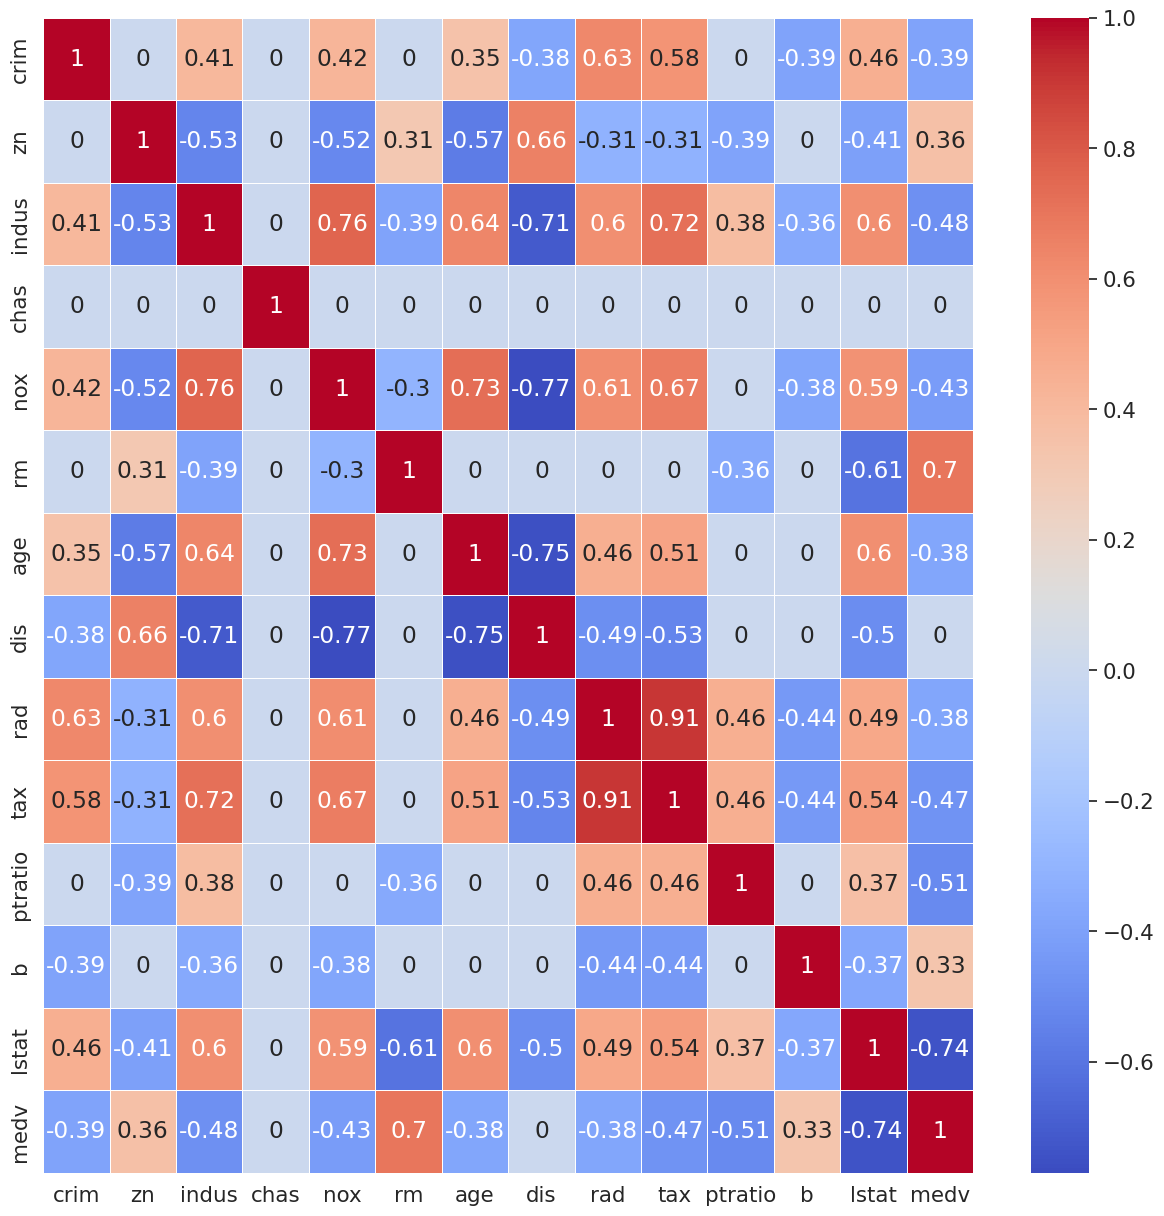

In [104]:
# Матрица корреляции
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap='coolwarm')

## Разбиение на обучающую (train) и тестовую (test) выборки

In [20]:
X = df[feature_names]
y = df[target_name]

# обучающая выборка = 70%, тестовая (test_size) = 30%
# shuffle=True - перед разделением данные необходимо перемешать
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True, random_state=42)

In [21]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,-0.417044,-0.487722,-1.306878,0,-0.835284,0.207096,-0.351157,1.077737,3,222,0.113032,0.410571,-1.043322
116,-0.405205,-0.487722,-0.164408,0,-0.066472,-0.154767,0.139579,-0.506241,6,432,-0.303094,0.401580,-0.085935
45,-0.400569,-0.487722,-0.616727,0,-0.921667,-0.858548,-1.236615,0.620527,3,233,-0.256858,0.441052,-0.342453
16,-0.297868,-0.487722,-0.437258,0,-0.144217,-0.498110,-1.396638,0.334449,4,307,1.176466,0.330860,-0.851284
468,1.392077,-0.487722,1.015999,0,0.218592,-0.510932,0.086238,-0.421483,24,666,0.806576,0.132296,0.767723


## Построение модели линейной регрессии

In [22]:
%matplotlib inline
def evaluate_preds(true_values, pred_values):
    """Оценка качества модели и график preds vs true"""

    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )

    plt.figure(figsize=(8,8))

    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 51], [0, 51], linestyle='--', color='black')  # диагональ, где true_values = pred_values

    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

    plt.show()

In [85]:
def compare_models(true_values, pred_values, model_name, df_metrics):
    """Сохранение метрик качества в датафрейм для дальнейшего сравнения"""

    R2 = round(r2(true_values, pred_values), 3)
    RMSE = round(np.sqrt(mse(true_values, pred_values)), 3)
    MSE = round(mse(true_values, pred_values), 3)

    # Добавить значения в датафрейм для сравнения метрик
    #df_metrics = pd.DataFrame([R2, RMSE, MSE], columns=[model_name], index=['R2', 'RMSE', 'MSE'])
    new_data = pd.Series([R2, RMSE, MSE], name = model_name, index=['R2', 'RMSE', 'MSE'])
    df_metrics = pd.concat([df_metrics, new_data], axis=1)
    return df_metrics


R2:	0.743
RMSE:	4.748
MSE:	22.545


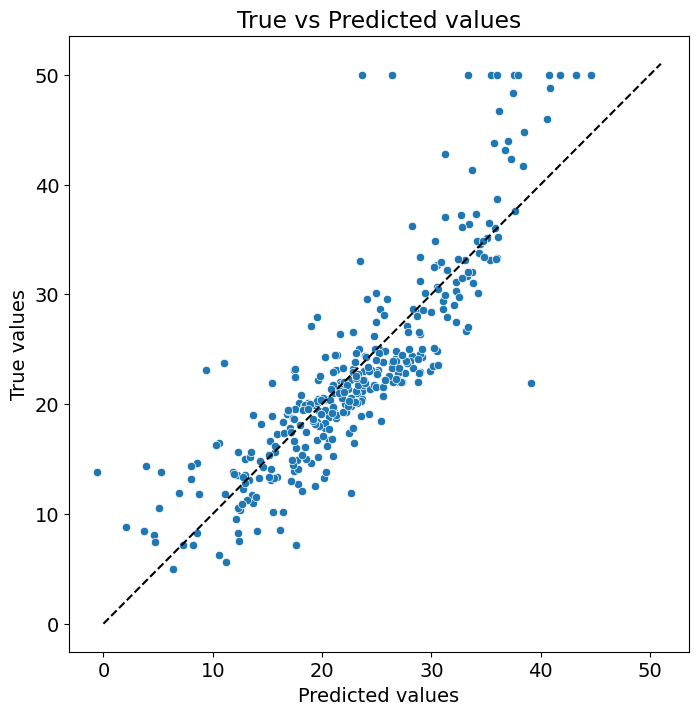

In [25]:
# Модель линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказание на обучающей выборке
y_train_preds = lr_model.predict(X_train)

# Постпроцессинг
#y_train_preds = np.clip(y_train_preds, a_min=5, a_max=50)

evaluate_preds(y_train, y_train_preds)

R2:	0.711
RMSE:	4.639
MSE:	21.517


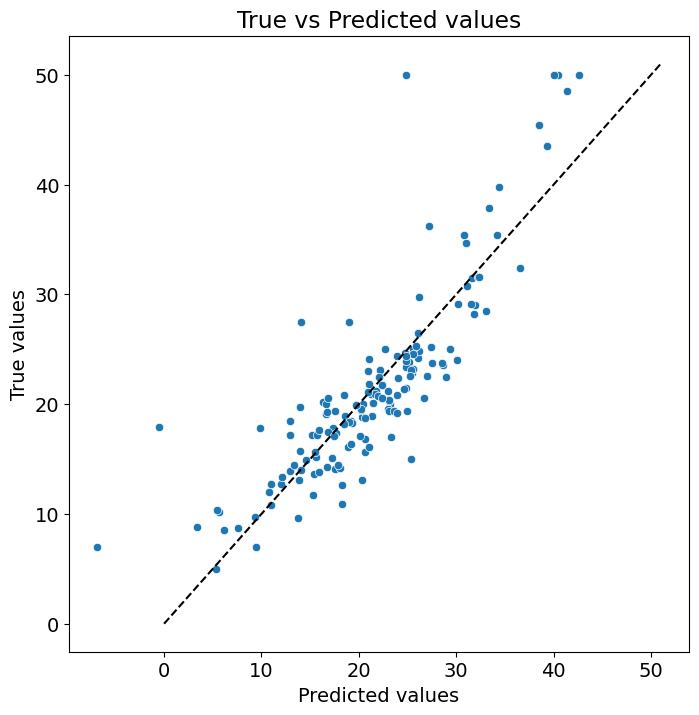

In [96]:
# Предсказание на тестовой выборке
y_test_preds = lr_model.predict(X_test)

# Постпроцессинг
#y_test_preds = np.clip(y_test_preds, a_min=5, a_max=50)

# Подсчет метрик качества и построение графика
evaluate_preds(y_test, y_test_preds)

# Сохранение метрик качества в датафрейм с метриками
df_metrics = compare_models(y_test, y_test_preds, 'LinearRegression', df_metrics)

## Построение модели дерева решений

R2:	0.854
RMSE:	3.579
MSE:	12.807


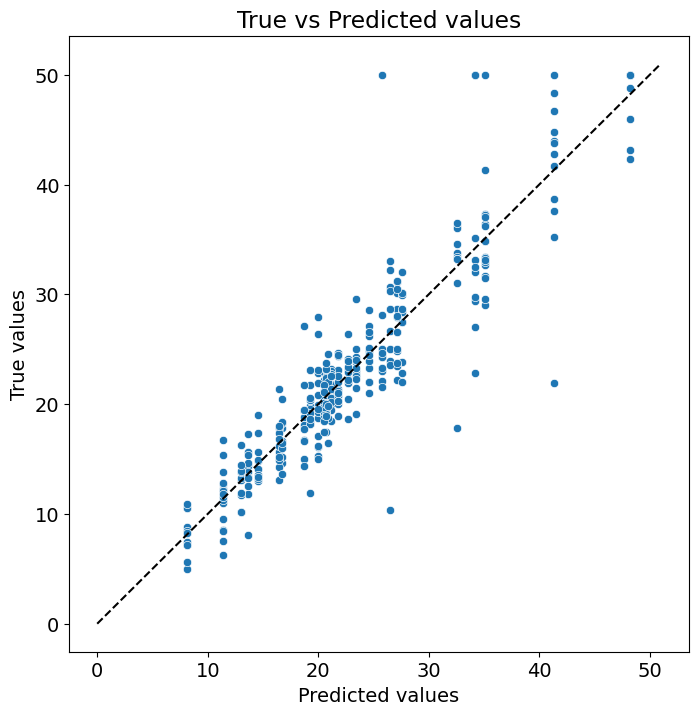

In [50]:
# Создание и обучение модели дерева решений
dt_model = DecisionTreeRegressor(
                                 max_depth=20, # глубина дерева
                                 min_samples_leaf=10, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(X_train, y_train)

# Предсказание дерева решений на обучающей выборке
y_train_preds = dt_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.769
RMSE:	4.145
MSE:	17.183


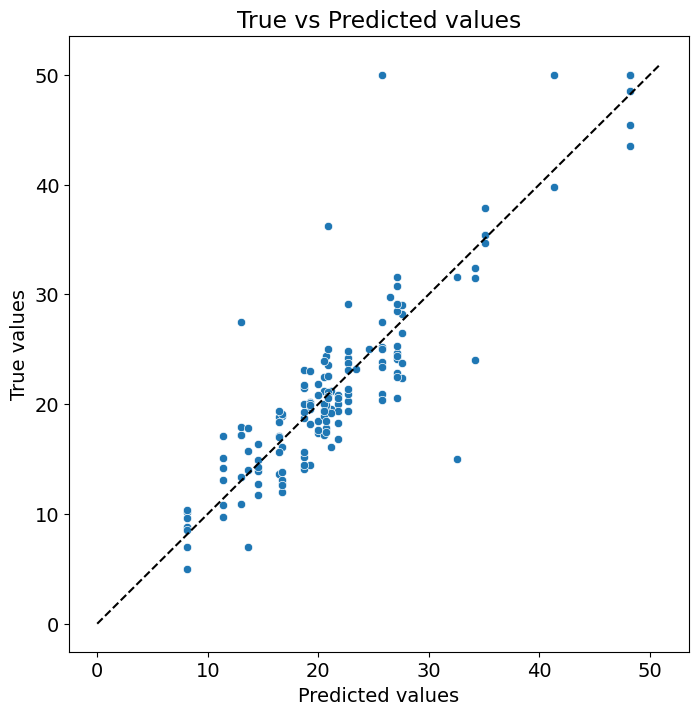

In [97]:
# Предсказание дерева решений на тестовой выборке
y_test_preds = dt_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

# Сохранение метрик качества в датафрейм с метриками
df_metrics = compare_models(y_test, y_test_preds, 'DecisionTreeRegressor', df_metrics)

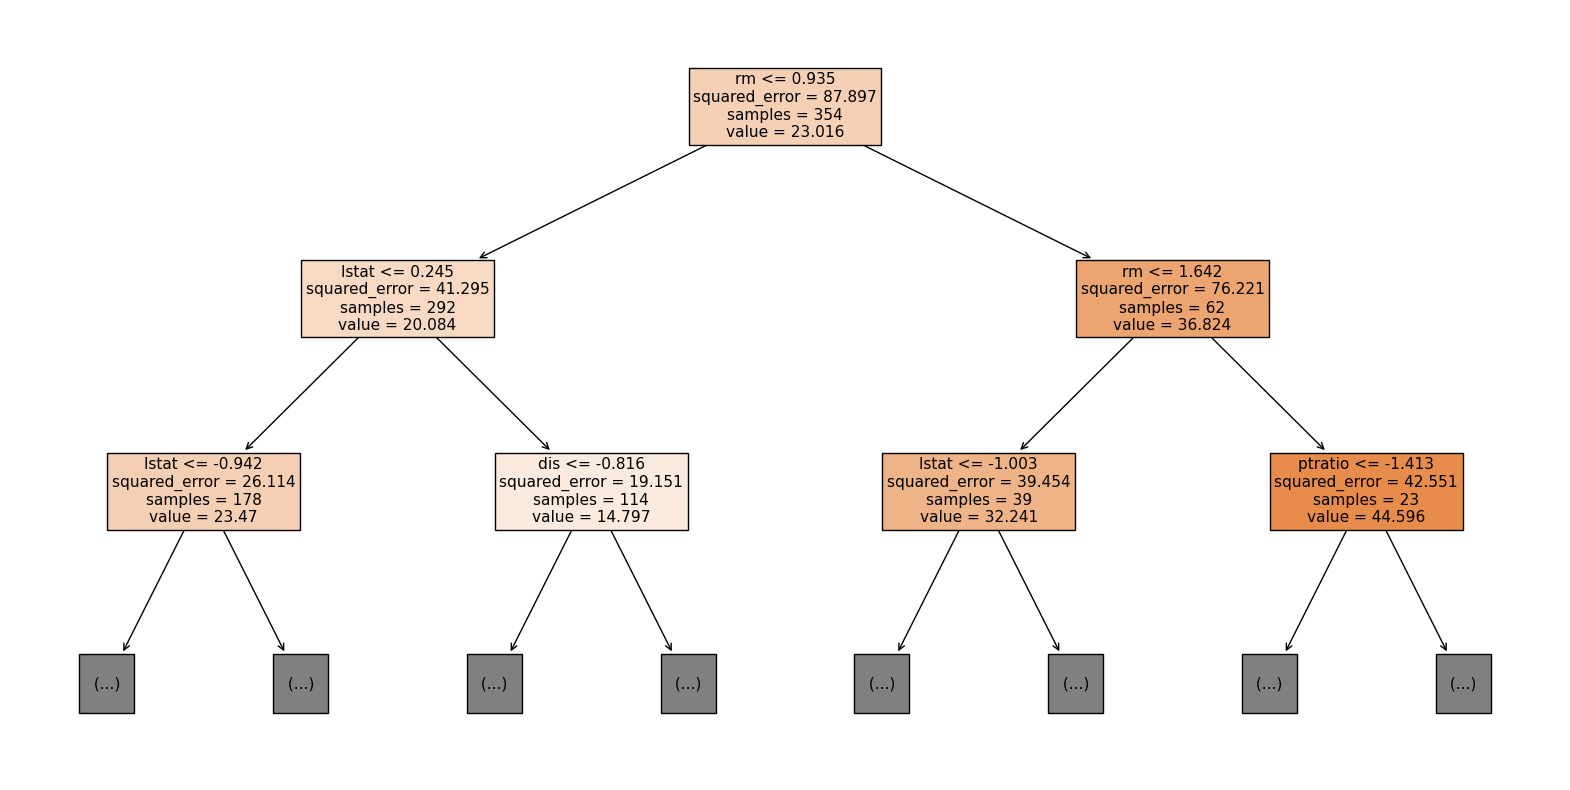

In [52]:
# Визуализация первых нескольких узлов дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, filled=True, max_depth=2)
plt.show()

## Построение модели случайного леса

R2:	0.758
RMSE:	4.611
MSE:	21.26


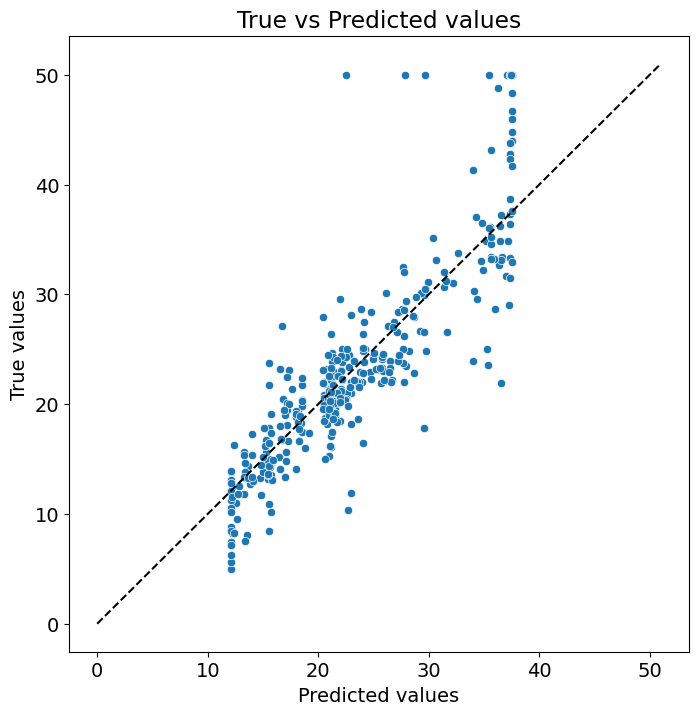

In [53]:
# Создание и обучение модели случайного леса
rf_model = RandomForestRegressor(
                                 max_depth=20, # глубина дерева
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(X_train, y_train)

# Предсказание случайного леса на обучающей выборке
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.716
RMSE:	4.598
MSE:	21.139


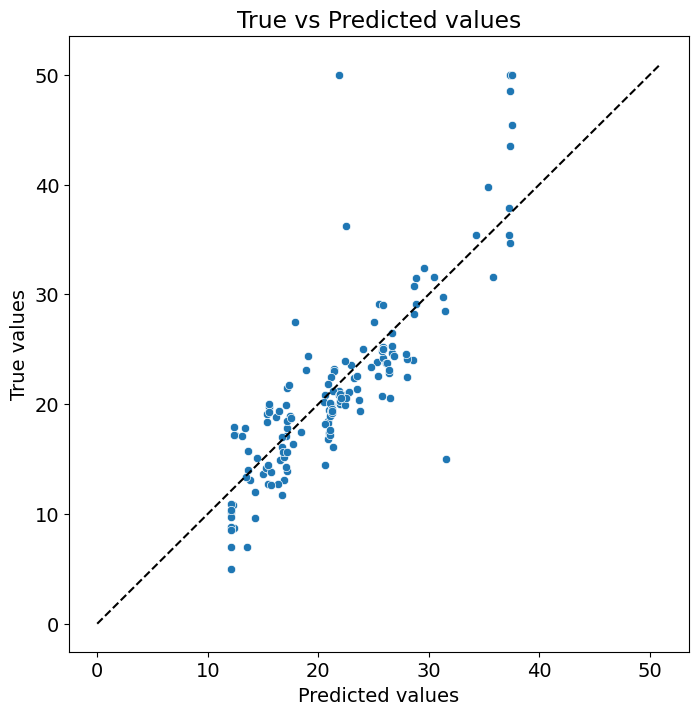

In [98]:
# Предсказание случайного леса на тестовой выборке
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

# Сохранение метрик качества в датафрейм с метриками
df_metrics = compare_models(y_test, y_test_preds, 'RandomForestRegressor', df_metrics)

## Сравнение моделей

In [99]:
df_metrics

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor
R2,0.711,0.769,0.716
RMSE,4.639,4.145,4.598
MSE,21.517,17.183,21.139


<Axes: >

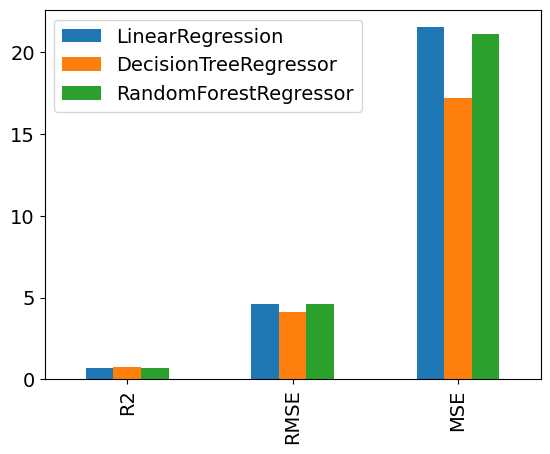

In [102]:
df_metrics.plot.bar()